# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

# **Data Load**

In [ ]:
df=pd.read_csv('/content/tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df=df.dropna(subset=['Age','Cabin'])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df=df.drop('PassengerId',axis=1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [ ]:
label_encoder=LabelEncoder()

In [ ]:
df['Name']=label_encoder.fit_transform(df['Name'])
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Ticket']=label_encoder.fit_transform(df['Ticket'])
df['Cabin']=label_encoder.fit_transform(df['Cabin'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

# **EDA**

In [ ]:
df.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.056699,-0.122672,-1.000000,0.022983,0.170596,0.181554,0.160284,0.179047,-0.015816,0.070736
Pclass,-0.056699,1.000000,-0.059134,0.056699,-0.410924,-0.132790,0.006411,0.224886,-0.298186,0.504778,0.190281
Name,-0.122672,-0.059134,1.000000,0.122672,-0.077362,0.041902,-0.055084,-0.083526,0.017875,0.007740,-0.179386
Sex,-1.000000,0.056699,0.122672,1.000000,-0.022983,-0.170596,-0.181554,-0.160284,-0.179047,0.015816,-0.070736
Age,0.022983,-0.410924,-0.077362,-0.022983,1.000000,0.062530,0.051144,-0.041230,0.180567,-0.248992,-0.028026
SibSp,0.170596,-0.132790,0.041902,-0.170596,0.062530,1.000000,0.252194,-0.052596,0.213014,-0.059229,0.179264
Parch,0.181554,0.006411,-0.055084,-0.181554,0.051144,0.252194,1.000000,0.138066,0.395685,-0.045777,0.025262
Ticket,0.160284,0.224886,-0.083526,-0.160284,-0.041230,-0.052596,0.138066,1.000000,0.189497,0.076429,-0.179764
Fare,0.179047,-0.298186,0.017875,-0.179047,0.180567,0.213014,0.395685,0.189497,1.000000,-0.214885,-0.226266
Cabin,-0.015816,0.504778,0.007740,0.015816,-0.248992,-0.059229,-0.045777,0.076429,-0.214885,1.000000,0.046516


In [ ]:
survived_corr=df.corr()['Survived']

In [ ]:
survived_corr

,Survived
Survived,1.000000
Pclass,-0.056699
Name,-0.122672
Sex,-1.000000
Age,0.022983
SibSp,0.170596
Parch,0.181554
Ticket,0.160284
Fare,0.179047
Cabin,-0.015816


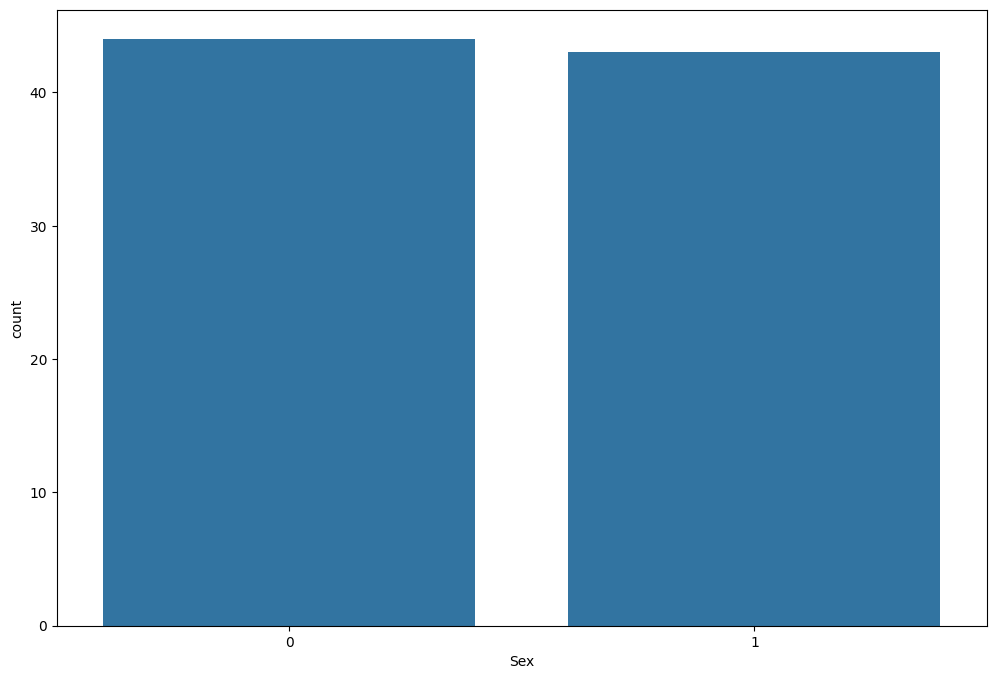

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Sex',data=df)
plt.show()

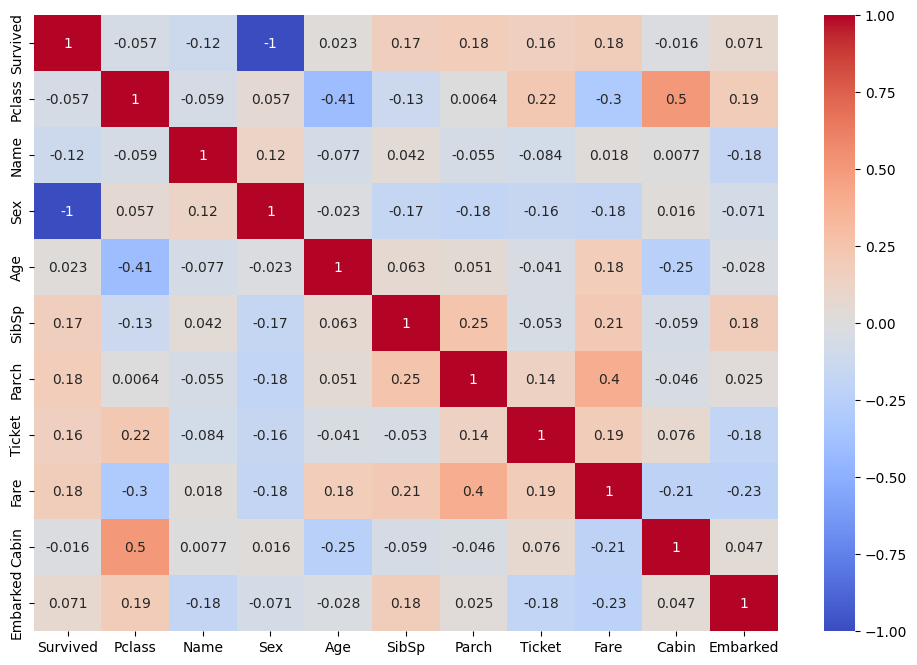

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# **Data Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Decision Tree**

In [ ]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred=dt_model.predict(X_test)

In [ ]:
dt_model

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_classification_report = classification_report(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

In [ ]:
dt_classification_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         8\n           1       1.00      1.00      1.00        10\n\n    accuracy                           1.00        18\n   macro avg       1.00      1.00      1.00        18\nweighted avg       1.00      1.00      1.00        18\n'

In [ ]:
dt_accuracy

1.0

# **Suppport Vector Machine**

In [ ]:
svc_model=SVC(random_state=42)
svc_model.fit(X_train,y_train)
svc_pred=svc_model.predict(X_test)

In [ ]:
svc_model

SVC(random_state=42)

In [ ]:
svc_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
svc_accuracy=accuracy_score(y_test,svc_pred)
svc_classification_model=classification_report(y_test,svc_pred)
svc_conf_matrix=confusion_matrix(y_test,svc_pred)

In [ ]:
svc_classification_model


'              precision    recall  f1-score   support\n\n           0       0.62      0.62      0.62         8\n           1       0.70      0.70      0.70        10\n\n    accuracy                           0.67        18\n   macro avg       0.66      0.66      0.66        18\nweighted avg       0.67      0.67      0.67        18\n'

In [ ]:
svc_accuracy

0.6666666666666666

# **Accuracy Comparison Dataframe**

In [ ]:
accuracy_data = {
    'Model': ['Decision Tree', 'Support Vector Machine'],
    'Accuracy': [dt_accuracy, svc_accuracy],
    'Classification Report': [dt_classification_report, svc_classification_model],
}

df = pd.DataFrame(accuracy_data)

In [ ]:
df

,Model,Accuracy,Classification Report
0,Decision Tree,1.000000,precision recall f1-score ...
1,Support Vector Machine,0.666667,precision recall f1-score ...
